# CRISP-DM: Klasifikasi Jamur (Poisonous atau Edible)

## 1. Business Understanding
- **Objective**: Membuat model machine learning yang dapat mengklasifikasikan apakah sebuah jamur bersifat **poisonous** (beracun) atau **edible** (dapat dimakan) berdasarkan karakteristiknya.
- **Problem**: Mengidentifikasi fitur-fitur tertentu pada jamur yang menentukan apakah mereka dapat dimakan atau beracun.
- **Project Goal**: Meningkatkan akurasi dalam klasifikasi jamur dengan menggunakan dataset dari UCI ML yang menggambarkan ciri-ciri jamur dalam berbagai kategori.
- **Success Criteria**: Model yang akurat dengan metrik evaluasi akurasi yang tinggi.

## 2. Data Understanding

### 2.1 Pengumpulan Data
Dataset berisi data jamur yang mencakup karakteristik fisik seperti bentuk topi, warna, tekstur, bau, ukuran gill (bagian bawah jamur), bentuk batang, warna spora, dan habitat. Data ini diambil dari **The Audubon Society Field Guide to North American Mushrooms** (1981), dan sudah tersedia pada [Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification/data?select=mushrooms.csv).

In [1]:
#Pertemuan 5

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### 2.2 Deskripsi Data
- **Target (Class)**: 
  - edible (e), poisonous (p)
  
- **Fitur**:
  - `cap-shape`: bell (b), conical (c), convex (x), flat (f), knobbed (k), sunken (s)
  - `cap-surface`: fibrous (f), grooves (g), scaly (y), smooth (s)
  - `cap-color`: brown (n), buff (b), cinnamon (c), gray (g), green (r), pink (p), purple (u), red (e), white (w), yellow (y)
  - `bruises`: bruises (t), no (f)
  - `odor`: almond (a), anise (l), creosote (c), fishy (y), foul (f), musty (m), none (n), pungent (p), spicy (s)
  - `gill-attachment`: attached (a), descending (d), free (f), notched (n)
  - `gill-spacing`: close (c), crowded (w), distant (d)
  - `gill-size`: broad (b), narrow (n)
  - `gill-color`: black (k), brown (n), buff (b), chocolate (h), gray (g), green (r), orange (o), pink (p), purple (u), red (e), white (w), yellow (y)
  - `stalk-shape`: enlarging (e), tapering (t)
  - `stalk-root`: bulbous (b), club (c), cup (u), equal (e), rhizomorphs (z), rooted (r), missing (?)
  - `stalk-surface-above-ring`: fibrous (f), scaly (y), silky (k), smooth (s)
  - `stalk-surface-below-ring`: fibrous (f), scaly (y), silky (k), smooth (s)
  - `stalk-color-above-ring`: brown (n), buff (b), cinnamon (c), gray (g), orange (o), pink (p), red (e), white (w), yellow (y)
  - `stalk-color-below-ring`: brown (n), buff (b), cinnamon (c), gray (g), orange (o), pink (p), red (e), white (w), yellow (y)
  - `veil-type`: partial (p), universal (u)
  - `veil-color`: brown (n), orange (o), white (w), yellow (y)
  - `ring-number`: none (n), one (o), two (t)
  - `ring-type`: cobwebby (c), evanescent (e), flaring (f), large (l), none (n), pendant (p), sheathing (s), zone (z)
  - `spore-print-color`: black (k), brown (n), buff (b), chocolate (h), green (r), orange (o), purple (u), white (w), yellow (y)
  - `population`: abundant (a), clustered (c), numerous (n), scattered (s), several (v), solitary (y)
  - `habitat`: grasses (g), leaves (l), meadows (m), paths (p), urban (u), waste (w), woods (d)

In [4]:
df.shape

(8124, 23)

- **Jumlah data**: Dataset terdiri dari **8124** baris dan 23 fitur (termasuk target).

In [5]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

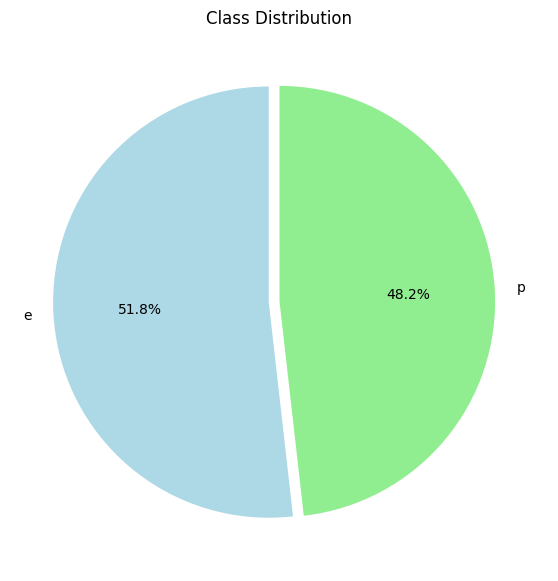

In [6]:
class_counts = df['class'].value_counts()

# Create a pie chart
plt.figure(figsize=(7, 7))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'], explode=(0.05, 0))  # Adjust the 'explode' to slightly separate the slices
plt.title('Class Distribution')
plt.show()

- **Keseimbangan kelas**: Kelas edible dan poisonous lumayan seimbang sehingga tidak perlu Undersampling ataupun Oversampling.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

- **Tipe data**: Seluruh fitur bersifat kategorikal, dan agar tidak terjadi ledakan dimensi, dapat dilakukan encoding dengan LabelEncoder.

In [8]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

- **Missing Values**: Tidak ada fitur dengan missing values atau nilai null.

In [9]:
for column in df.columns:
    print(df[column].value_counts())

class
e    4208
p    3916
Name: count, dtype: int64
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
bruises
f    4748
t    3376
Name: count, dtype: int64
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
gill-attachment
f    7914
a     210
Name: count, dtype: int64
gill-spacing
c    6812
w    1312
Name: count, dtype: int64
gill-size
b    5612
n    2512
Name: count, dtype: int64
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64
stalk-shape
t    4608
e    3516
Name: count, dtype: int64
stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: coun

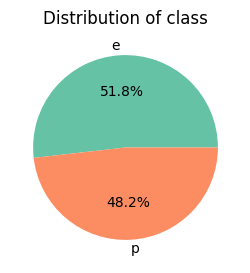

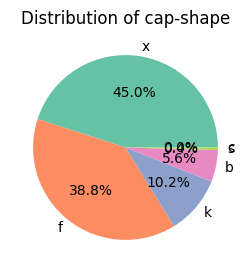

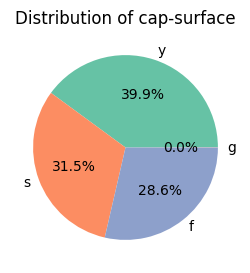

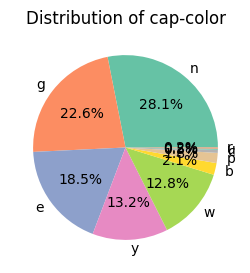

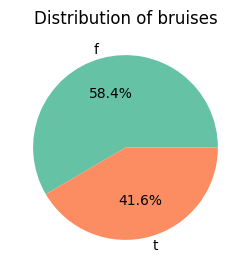

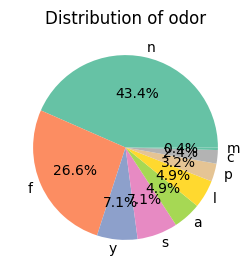

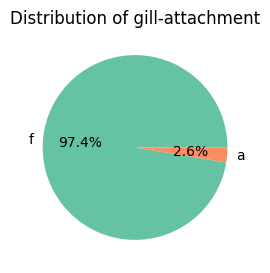

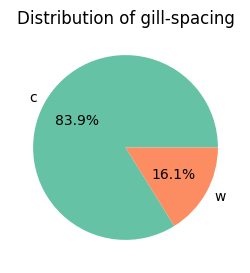

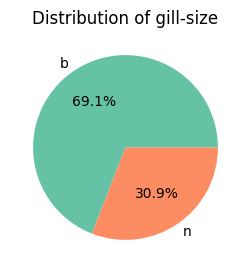

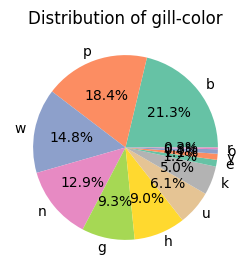

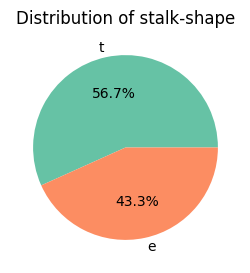

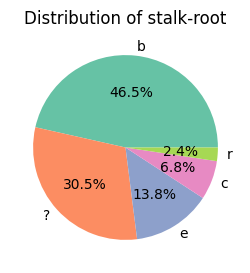

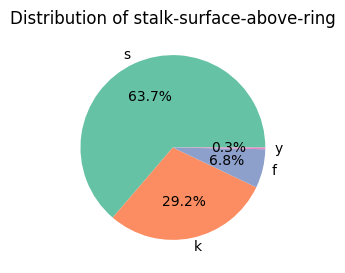

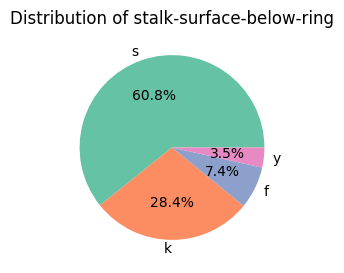

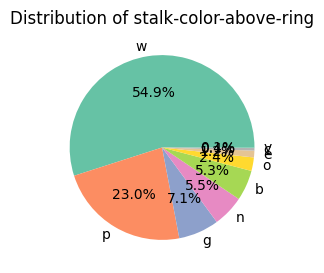

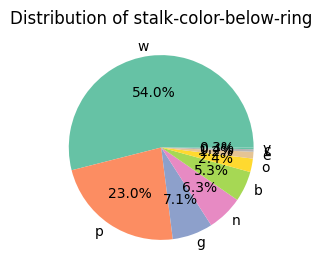

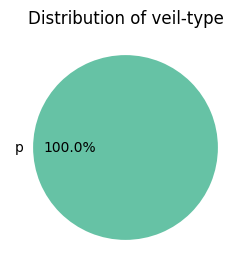

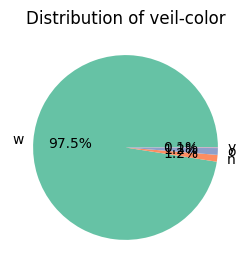

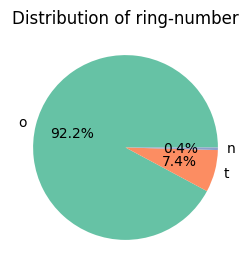

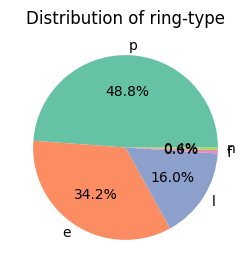

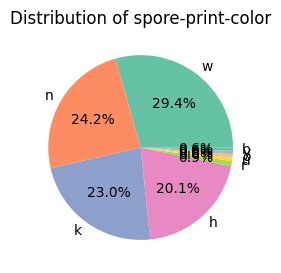

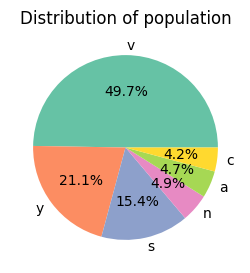

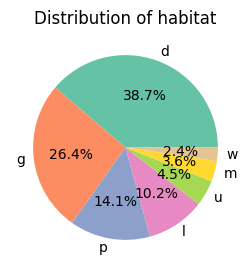

In [10]:
for column in df.columns:
    plt.figure(figsize=(3, 3))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set2"))
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()

- **Outliers**: Sulit dilakukan pengecekan outlier karena data kategorikal, namun dengan visualisasi pie chart, ditemukan banyak fitur yang sudah seimbang sementara beberapa kurang seimbang tapi masih layak pakai. Fitur veil-type hanya memiliki 1 nilai.

In [11]:
# Cari korelasi dengan Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

corr = {}
for col in df.columns:
    corr[col] = cramers_v(df[col], df['class'])

# Display correlations
corr = pd.DataFrame(corr.items(), columns=['Fitur', 'Nilai CramersV'])
print(corr.sort_values(by='Nilai CramersV', ascending=False))


                       Fitur  Nilai CramersV
0                      class        0.999753
5                       odor        0.971005
20         spore-print-color        0.752645
9                 gill-color        0.680830
19                 ring-type        0.603271
12  stalk-surface-above-ring        0.587944
13  stalk-surface-below-ring        0.574837
8                  gill-size        0.539758
14    stalk-color-above-ring        0.524850
15    stalk-color-below-ring        0.514725
4                    bruises        0.501280
21                population        0.487376
22                   habitat        0.440136
11                stalk-root        0.406805
7               gill-spacing        0.348052
1                  cap-shape        0.245571
3                  cap-color        0.218427
18               ring-number        0.214772
2                cap-surface        0.196925
17                veil-color        0.153421
6            gill-attachment        0.128424
10        

/tmp/ipykernel_602655/1740712597.py:7: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))


- **Correlation**: Korelasi kategorikal dihitung menggunakan Nilai CramersV. Dapat dipertimbangkan untuk membuang fitur dengan Nilai CramersV yang rendah, veil-type dapat didrop.

## 3. Data Preparation

### 3.1 Menghapus Kolom `veil-type`
Berdasarkan hasil analisis **Cramér's V**, kolom `veil-type` memiliki nilai asosiasi **NaN**, yang berarti tidak memiliki hubungan yang signifikan dengan target `class`. Oleh karena itu, kolom ini dihapus dari dataset karena tidak memberikan informasi yang berguna untuk model klasifikasi.

In [12]:
# Menghapus kolom 'veil-type'
df = df.drop(columns=['veil-type'])

### 3.2 Label Encoding Fitur Kategorikal
Semua fitur dalam dataset ini bersifat kategorikal, sehingga kita perlu mengonversinya menjadi nilai numerik agar dapat digunakan dalam model machine learning. Proses ini dilakukan menggunakan **Label Encoding**, yang akan mengubah setiap kategori menjadi angka unik.

Langkah-langkah yang dilakukan:
- Setiap kategori dalam fitur diubah menjadi nilai numerik menggunakan `LabelEncoder` dari library `sklearn`.
- Fitur target `class` (edible atau poisonous) juga di-encode menjadi nilai numerik (edible: 0, poisonous: 1).

In [13]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

# Melakukan label encoding pada semua kolom kategorikal
for column in df.columns:
    df[column] = le.fit_transform(df[column])

In [14]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


## 4. Modeling

Pada tahap ini, kita akan melakukan modeling dengan tujuan mengklasifikasikan apakah jamur dalam dataset bersifat **poisonous** atau **edible**. Fitur yang digunakan adalah semua fitur dalam `df` kecuali fitur target `class`, yang akan menjadi label prediksi kita.

### 4.1 Pembagian Dataset
Langkah pertama adalah membagi dataset menjadi data pelatihan (**train**) dan data pengujian (**test**) menggunakan `train_test_split` dari `sklearn`.

In [15]:
# Memisahkan fitur dan target
X = df.drop(columns=['class'])
y = df['class']

# Membagi dataset menjadi data training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.2 Algoritma Klasifikasi dan Pencarian Hyperparameter dengan GridSearchCV

Kita akan menggunakan beberapa algoritma klasifikasi dari sklearn seperti:

- **Logistic Regression**
- **Random Forest**
- **Support Vector Machine (SVM)**
- **K-Nearest Neighbors (KNN)**

Untuk setiap algoritma, kita akan menggunakan **GridSearchCV** untuk mencari parameter terbaik yang menghasilkan akurasi tertinggi.

### Logistic Regression

In [16]:
# Parameter grid untuk Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}

# Inisialisasi model dan GridSearch
lr = LogisticRegression(max_iter=1000)
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='accuracy')

# Fit model
grid_search_lr.fit(X_train, y_train)

# Menampilkan parameter terbaik dan akurasi
best_lr = grid_search_lr.best_estimator_
print(f"Logistic Regression Best Params: {grid_search_lr.best_params_}")
print(f"Logistic Regression Best Accuracy: {grid_search_lr.best_score_}")

Logistic Regression Best Params: {'C': 100}
Logistic Regression Best Accuracy: 0.9664562089181027


### Random Forest

In [17]:
# Parameter grid untuk Random Forest
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30]}

# Inisialisasi model dan GridSearch
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit model
grid_search_rf.fit(X_train, y_train)

# Menampilkan parameter terbaik dan akurasi
best_rf = grid_search_rf.best_estimator_
print(f"Random Forest Best Params: {grid_search_rf.best_params_}")
print(f"Random Forest Best Accuracy: {grid_search_rf.best_score_}")

Random Forest Best Params: {'max_depth': 10, 'n_estimators': 100}
Random Forest Best Accuracy: 1.0


### Support Vector Machine (SVM)

In [18]:
# Parameter grid untuk SVM
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

# Inisialisasi model dan GridSearch
svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')

# Fit model
grid_search_svm.fit(X_train, y_train)

# Menampilkan parameter terbaik dan akurasi
best_svm = grid_search_svm.best_estimator_
print(f"SVM Best Params: {grid_search_svm.best_params_}")
print(f"SVM Best Accuracy: {grid_search_svm.best_score_}")

SVM Best Params: {'C': 10, 'kernel': 'rbf'}
SVM Best Accuracy: 1.0


### K-Nearest Neighbors (KNN)

In [19]:
# Parameter grid untuk KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Inisialisasi model dan GridSearch
knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')

# Fit model
grid_search_knn.fit(X_train, y_train)

# Menampilkan parameter terbaik dan akurasi
best_knn = grid_search_knn.best_estimator_
print(f"KNN Best Params: {grid_search_knn.best_params_}")
print(f"KNN Best Accuracy: {grid_search_knn.best_score_}")

KNN Best Params: {'n_neighbors': 3, 'weights': 'distance'}
KNN Best Accuracy: 0.9992307692307693


## 4.3 Evaluasi Model pada Data Pengujian

Setelah mendapatkan model dengan parameter terbaik dari **GridSearchCV** untuk setiap algoritma, kita dapat mengevaluasi kinerja model tersebut pada data pengujian.

In [20]:
# Evaluasi pada data pengujian
y_pred_lr = best_lr.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_svm = best_svm.predict(X_test)
y_pred_knn = best_knn.predict(X_test)

# Menampilkan akurasi untuk setiap model
print(f"Logistic Regression Test Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"SVM Test Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"KNN Test Accuracy: {accuracy_score(y_test, y_pred_knn)}")

Logistic Regression Test Accuracy: 0.9667692307692307
Random Forest Test Accuracy: 1.0
SVM Test Accuracy: 1.0
KNN Test Accuracy: 0.9981538461538462


## 5. Evaluation

Setelah melakukan training pada model dengan parameter terbaik yang ditemukan menggunakan **GridSearchCV**, kita dapat mengevaluasi performa model pada data pengujian. Hasil evaluasi mencakup akurasi dari beberapa model yang telah digunakan dan ditampilkan dalam bentuk DataFrame yang mengurutkan model berdasarkan tingkat akurasi.

In [21]:
log_reg_acc = accuracy_score(y_test, y_pred_lr)
rf_acc = accuracy_score(y_test, y_pred_rf)
svm_acc = accuracy_score(y_test, y_pred_svm)
knn_acc = accuracy_score(y_test, y_pred_knn)

# Hasil evaluasi
acc_results = [['Logistic Regression', log_reg_acc],
               ['Random Forest', rf_acc],
               ['SVM', svm_acc],
               ['KNN Classifier', knn_acc]]

# Membuat DataFrame dan mengurutkan hasil berdasarkan akurasi
acc_df = pd.DataFrame(acc_results, columns=['Algoritma', 'Akurasi'])
acc_df = acc_df.sort_values('Akurasi', ascending=False)

# Menampilkan DataFrame
print(acc_df)

             Algoritma   Akurasi
1        Random Forest  1.000000
2                  SVM  1.000000
3       KNN Classifier  0.998154
0  Logistic Regression  0.966769


--> Model dengan **Random Forest** dan **SVM** memiliki nilai akurasi yang tertinggi, yaitu **100%**.

### Confusion Matrix

Untuk evaluasi yang lebih mendalam, kita menggunakan **Confusion Matrix** untuk melihat performa model dalam memprediksi kelas target. Confusion Matrix membantu memvisualisasikan kesalahan klasifikasi yang dibuat oleh model. Berikut adalah Confusion Matrix untuk masing-masing model:

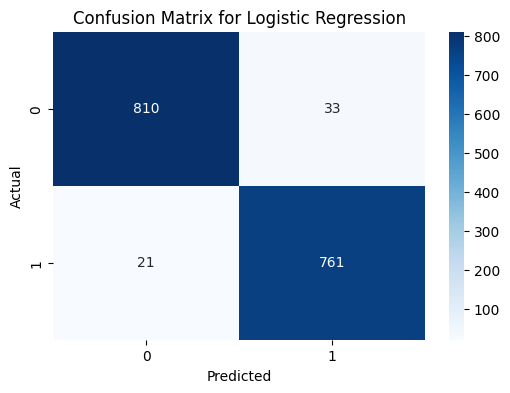

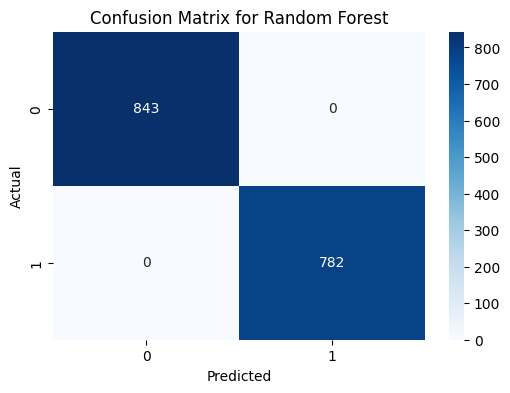

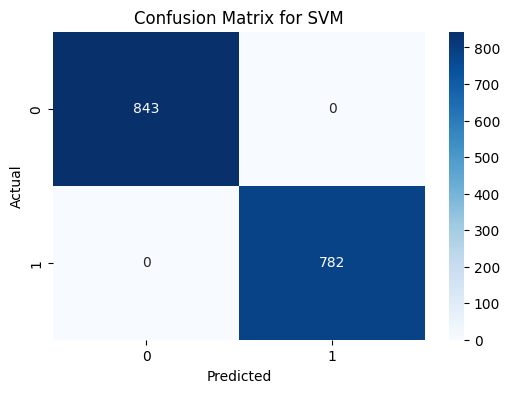

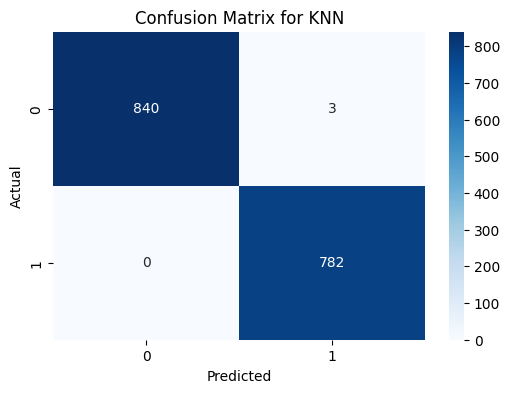

In [22]:
# Confusion matrix untuk Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix untuk SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix untuk KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 6. Deployment

Setelah mendapatkan model terbaik berdasarkan hasil evaluasi, kita akan menyimpan model random forest dalam format **pickle** menggunakan **joblib**. Model ini kemudian akan dideploy menggunakan **Streamlit** untuk mempermudah akses dan penggunaan di lingkungan yang berbeda.

### 6.1 Menyimpan Model dengan Joblib

In [23]:
import joblib

joblib.dump(best_rf, 'model.pkl')

['model.pkl']

## 6.2 Deploy Model ke Streamlit

Untuk membuat aplikasi web yang interaktif, kita akan menggunakan **Streamlit**. Dengan Streamlit, kita dapat membangun antarmuka web yang sederhana namun intuitif, memungkinkan pengguna untuk memberikan input data dan mendapatkan hasil prediksi dari model yang sudah dilatih.

### Langkah-langkah:

1. **Install Streamlit**:
    ```bash
    pip install streamlit
    ```

2. **Buat file Python baru** `app.py` dan tulis kode berikut untuk menghubungkan model yang telah disimpan ke aplikasi Streamlit:
   
    ```python
    import streamlit as st
    import joblib
    import numpy as np
    
    # Memuat model yang telah disimpan
    model = joblib.load('model.pkl')
    
    # Judul aplikasi
    st.title('Mushroom Prediction')
    
    # Membuat form input untuk fitur-fitur yang dibutuhkan model
    st.subheader('Input Mushroom\'s Features:')
    
    # Mengatur layout ke dalam 2 kolom
    col1, col2 = st.columns(2)
    
    with col1:
        cap_shape = st.selectbox('Cap Shape', ['bell (b)', 'conical (c)', 'convex (x)', 'flat (f)', 'knobbed (k)', 'sunken (s)'])
        cap_surface = st.selectbox('Cap Surface', ['fibrous (f)', 'grooves (g)', 'scaly (y)', 'smooth (s)'])
        cap_color = st.selectbox('Cap Color', ['brown (n)', 'buff (b)', 'cinnamon (c)', 'gray (g)', 'green (r)', 'pink (p)', 'purple (u)', 'red (e)', 'white (w)', 'yellow (y)'])
        bruises = st.radio('Bruises', ['Yes (bruises)', 'No (no)'])
        odor = st.selectbox('Odor', ['almond (a)', 'anise (l)', 'creosote (c)', 'fishy (y)', 'foul (f)', 'musty (m)', 'none (n)', 'pungent (p)', 'spicy (s)'])
        gill_attachment = st.selectbox('Gill Attachment', ['attached (a)', 'descending (d)', 'free (f)', 'notched (n)'])
        gill_spacing = st.selectbox('Gill Spacing', ['close (c)', 'crowded (w)', 'distant (d)'])
        gill_size = st.radio('Gill Size', ['broad (b)', 'narrow (n)'])
        veil_color = st.selectbox('Veil Color', ['brown (n)', 'orange (o)', 'white (w)', 'yellow (y)'])
        gill_color = st.selectbox('Gill Color', ['black (k)', 'brown (n)', 'buff (b)', 'chocolate (h)', 'gray (g)', 'green (r)', 'orange (o)', 'pink (p)', 'purple (u)', 'red (e)', 'white (w)', 'yellow (y)'])
    
    with col2:
        ring_number = st.radio('Ring Number', ['none (n)', 'one (o)', 'two (t)'])
        ring_type = st.selectbox('Ring Type', ['cobwebby (c)', 'evanescent (e)', 'flaring (f)', 'large (l)', 'none (n)', 'pendant (p)', 'sheathing (s)', 'zone (z)'])
        stalk_shape = st.selectbox('Stalk Shape', ['enlarging (e)', 'tapering (t)'])
        stalk_root = st.selectbox('Stalk Root', ['bulbous (b)', 'club (c)', 'cup (u)', 'equal (e)', 'rhizomorphs (z)', 'rooted (r)', 'missing (?)'])
        stalk_surface_above_ring = st.selectbox('Stalk Surface Above Ring', ['fibrous (f)', 'scaly (y)', 'silky (k)', 'smooth (s)'])
        stalk_surface_below_ring = st.selectbox('Stalk Surface Below Ring', ['fibrous (f)', 'scaly (y)', 'silky (k)', 'smooth (s)'])
        stalk_color_above_ring = st.selectbox('Stalk Color Above Ring', ['brown (n)', 'buff (b)', 'cinnamon (c)', 'gray (g)', 'orange (o)', 'pink (p)', 'red (e)', 'white (w)', 'yellow (y)'])
        stalk_color_below_ring = st.selectbox('Stalk Color Below Ring', ['brown (n)', 'buff (b)', 'cinnamon (c)', 'gray (g)', 'orange (o)', 'pink (p)', 'red (e)', 'white (w)', 'yellow (y)'])
        spore_print_color = st.selectbox('Spore Print Color', ['black (k)', 'brown (n)', 'buff (b)', 'chocolate (h)', 'green (r)', 'orange (o)', 'purple (u)', 'white (w)', 'yellow (y)'])
        population = st.selectbox('Population', ['abundant (a)', 'clustered (c)', 'numerous (n)', 'scattered (s)', 'several (v)', 'solitary (y)'])
    
    habitat = st.selectbox('Habitat', ['grasses (g)', 'leaves (l)', 'meadows (m)', 'paths (p)', 'urban (u)', 'waste (w)', 'woods (d)'])
    
    # Mapping pilihan ke nilai label-encoded
    mapping = {
        'cap_shape': {'bell (b)': 0, 'conical (c)': 1, 'convex (x)': 2, 'flat (f)': 3, 'knobbed (k)': 4, 'sunken (s)': 5},
        'cap_surface': {'fibrous (f)': 0, 'grooves (g)': 1, 'scaly (y)': 2, 'smooth (s)': 3},
        'cap_color': {'brown (n)': 0, 'buff (b)': 1, 'cinnamon (c)': 2, 'gray (g)': 3, 'green (r)': 4, 'pink (p)': 5, 'purple (u)': 6, 'red (e)': 7, 'white (w)': 8, 'yellow (y)': 9},
        'bruises': {'Yes (bruises)': 1, 'No (no)': 0},
        'odor': {'almond (a)': 0, 'anise (l)': 1, 'creosote (c)': 2, 'fishy (y)': 3, 'foul (f)': 4, 'musty (m)': 5, 'none (n)': 6, 'pungent (p)': 7, 'spicy (s)': 8},
        'gill_attachment': {'attached (a)': 0, 'descending (d)': 1, 'free (f)': 2, 'notched (n)': 3},
        'gill_spacing': {'close (c)': 0, 'crowded (w)': 1, 'distant (d)': 2},
        'gill_size': {'broad (b)': 0, 'narrow (n)': 1},
        'gill_color': {'black (k)': 0, 'brown (n)': 1, 'buff (b)': 2, 'chocolate (h)': 3, 'gray (g)': 4, 'green (r)': 5, 'orange (o)': 6, 'pink (p)': 7, 'purple (u)': 8, 'red (e)': 9, 'white (w)': 10, 'yellow (y)': 11},
        'stalk_shape': {'enlarging (e)': 0, 'tapering (t)': 1},
        'stalk_root': {'bulbous (b)': 0, 'club (c)': 1, 'cup (u)': 2, 'equal (e)': 3, 'rhizomorphs (z)': 4, 'rooted (r)': 5, 'missing (?)': 6},
        'stalk_surface_above_ring': {'fibrous (f)': 0, 'scaly (y)': 1, 'silky (k)': 2, 'smooth (s)': 3},
        'stalk_surface_below_ring': {'fibrous (f)': 0, 'scaly (y)': 1, 'silky (k)': 2, 'smooth (s)': 3},
        'stalk_color_above_ring': {'brown (n)': 0, 'buff (b)': 1, 'cinnamon (c)': 2, 'gray (g)': 3, 'orange (o)': 4, 'pink (p)': 5, 'red (e)': 6, 'white (w)': 7, 'yellow (y)': 8},
        'stalk_color_below_ring': {'brown (n)': 0, 'buff (b)': 1, 'cinnamon (c)': 2, 'gray (g)': 3, 'orange (o)': 4, 'pink (p)': 5, 'red (e)': 6, 'white (w)': 7, 'yellow (y)': 8},
        'veil_color': {'brown (n)': 0, 'orange (o)': 1, 'white (w)': 2, 'yellow (y)': 3},
        'ring_number': {'none (n)': 0, 'one (o)': 1, 'two (t)': 2},
        'ring_type': {'cobwebby (c)': 0, 'evanescent (e)': 1, 'flaring (f)': 2, 'large (l)': 3, 'none (n)': 4, 'pendant (p)': 5, 'sheathing (s)': 6, 'zone (z)': 7},
        'spore_print_color': {'black (k)': 0, 'brown (n)': 1, 'buff (b)': 2, 'chocolate (h)': 3, 'green (r)': 4, 'orange (o)': 5, 'purple (u)': 6, 'white (w)': 7, 'yellow (y)': 8},
        'population': {'abundant (a)': 0, 'clustered (c)': 1, 'numerous (n)': 2, 'scattered (s)': 3, 'several (v)': 4, 'solitary (y)': 5},
        'habitat': {'grasses (g)': 0, 'leaves (l)': 1, 'meadows (m)': 2, 'paths (p)': 3, 'urban (u)': 4, 'waste (w)': 5, 'woods (d)': 6}
    }
    
    # Konversi input pengguna ke nilai label-encoded
    user_input = np.array([[mapping['cap_shape'][cap_shape],
                            mapping['cap_surface'][cap_surface],
                            mapping['cap_color'][cap_color],
                            mapping['bruises'][bruises],
                            mapping['odor'][odor],
                            mapping['gill_attachment'][gill_attachment],
                            mapping['gill_spacing'][gill_spacing],
                            mapping['gill_size'][gill_size],
                            mapping['gill_color'][gill_color],
                            mapping['stalk_shape'][stalk_shape],
                            mapping['stalk_root'][stalk_root],
                            mapping['stalk_surface_above_ring'][stalk_surface_above_ring],
                            mapping['stalk_surface_below_ring'][stalk_surface_below_ring],
                            mapping['stalk_color_above_ring'][stalk_color_above_ring],
                            mapping['stalk_color_below_ring'][stalk_color_below_ring],
                            mapping['veil_color'][veil_color],
                            mapping['ring_number'][ring_number],
                            mapping['ring_type'][ring_type],
                            mapping['spore_print_color'][spore_print_color],
                            mapping['population'][population],
                            mapping['habitat'][habitat]]])
    
    # Menjalankan prediksi saat tombol ditekan
    if st.button('Prediction'):
        prediction = model.predict(user_input)
        st.write(f'Prediction Result: {"Poisonous" if prediction[0] == 1 else "Edible"}')
    ```

### 6.3 Menjalankan Aplikasi Streamlit

Untuk menjalankan aplikasi, ikuti langkah berikut:

1. **Buka terminal atau command prompt**.
2. **Navigasi ke folder tempat file `app.py` disimpan**.
3. **Jalankan perintah berikut**:
    ```bash
    streamlit run app.py
    ```

Streamlit akan membuka antarmuka web di browser. Pengguna dapat memasukkan nilai fitur untuk melakukan prediksi dan melihat hasil langsung di halaman web.

---

Copyright © 2024 by Jonathan Chandra Hermawan


https://github.com/cauchips